In [33]:
import pandas as pd

data = pd.read_parquet('database.parquet')
data

,eid,ref_eid,id_x,time,id_y,assigned_domain,journal,abstract
0,2-s2.0-85111011520,2-s2.0-0028405041,2-s2.0-85111011520,2021,2-s2.0-0028405041,earth science,Radiation Measurements,"In previous work, we have discussed the way in..."
1,2-s2.0-85111011520,2-s2.0-0027331194,2-s2.0-85111011520,2021,2-s2.0-0027331194,earth science,Quaternary Science Reviews,Spatial and temporal patterns in lake-level da...
2,2-s2.0-85111011520,2-s2.0-85083822098,2-s2.0-85111011520,2021,2-s2.0-85083822098,earth science,Quaternary Science Reviews,High-resolution pollen and charcoal records fr...
3,2-s2.0-85111011520,2-s2.0-79961139006,2-s2.0-85111011520,2021,2-s2.0-79961139006,earth science,Australian Journal of Earth Sciences,"By comparison with the Northern Hemisphere, th..."
4,2-s2.0-85111011520,2-s2.0-85067258849,2-s2.0-85111011520,2021,2-s2.0-85067258849,earth science,Scientific Drilling,A 70m long continental sediment record was rec...
...,...,...,...,...,...,...,...,...
1543051,2-s2.0-80955136511,2-s2.0-0002388860,2-s2.0-80955136511,2011,2-s2.0-0002388860,mathematical and physical science,Psychometrika,A distinction is drawn between redundancy meas...
1543052,2-s2.0-80955136511,2-s2.0-0033886791,2-s2.0-80955136511,2011,2-s2.0-0033886791,information science,IEEE Transactions on Image Processing,This paper discusses the interest of binary pa...
1543053,2-s2.0-80955136511,2-s2.0-33845589304,2-s2.0-80955136511,2011,2-s2.0-33845589304,mathematical and physical science,Proceedings of the IEEE Computer Society Confe...,"In this paper we propose diffusion distance, a..."
1543054,2-s2.0-80955136511,2-s2.0-33745728148,2-s2.0-80955136511,2011,2-s2.0-33745728148,management science,International Geoscience and Remote Sensing Sy...,The hierarchical image segmentation (HSEG) alg...


In [34]:
data['assigned_domain'].value_counts()

assigned_domain
earth science                        989086
chemical science                     267577
engineering and materials science     90087
mathematical and physical science     79556
management science                    42083
information science                   33932
life science                          24825
health science                        15910
Name: count, dtype: int64

In [35]:
import pandas as pd

# 假设你的 DataFrame 名叫 df
# 示例代码
df_grouped = data.groupby('eid').agg({
    'ref_eid': list,
    'time': 'first',
    'assigned_domain': list,
}).reset_index()


In [36]:
df_grouped

,eid,ref_eid,time,assigned_domain
0,2-s2.0-0000076956,"[2-s2.0-0026614945, 2-s2.0-0024197991, 2-s2.0-...",2000,"[earth science, chemical science, chemical sci..."
1,2-s2.0-0000154187,"[2-s2.0-84879889857, 2-s2.0-0346870530, 2-s2.0...",2001,"[earth science, earth science, earth science, ..."
2,2-s2.0-0000213397,"[2-s2.0-0041382198, 2-s2.0-0024221297, 2-s2.0-...",2001,"[mathematical and physical science, earth scie..."
3,2-s2.0-0000251905,"[2-s2.0-0019390193, 2-s2.0-84879880120, 2-s2.0...",2000,"[chemical science, earth science, earth scienc..."
4,2-s2.0-0000292382,"[2-s2.0-0024850051, 2-s2.0-0030471753, 2-s2.0-...",2001,"[earth science, earth science, information sci..."
...,...,...,...,...
39378,2-s2.0-9744287123,"[2-s2.0-0027061958, 2-s2.0-0028563248]",2000,"[earth science, earth science]"
39379,2-s2.0-9944222633,"[2-s2.0-9944241388, 2-s2.0-9944263029]",2000,"[management science, management science]"
39380,2-s2.0-9944231880,"[2-s2.0-0035056250, 2-s2.0-0033025887, 2-s2.0-...",2005,"[mathematical and physical science, earth scie..."
39381,2-s2.0-9944242258,"[2-s2.0-0035989619, 2-s2.0-0037357802, 2-s2.0-...",2004,"[chemical science, chemical science, chemical ..."


In [37]:
# 展开 assigned_domain 为单独行
df_exploded = df_grouped.explode('assigned_domain')

# 按年份和领域统计数量
domain_counts = df_exploded.groupby(['time', 'assigned_domain']).size().reset_index(name='count')

# 构造成每行是年份，每列是领域的格式
pivot_df = domain_counts.pivot(index='time', columns='assigned_domain', values='count').fillna(0).astype(int)
pivot_df


assigned_domain,chemical science,earth science,engineering and materials science,health science,information science,life science,management science,mathematical and physical science
time,,,,,,,,
1996,0,2,1,0,0,0,0,0
1997,11,60,4,0,0,0,0,30
1998,3,36,0,0,1,0,0,16
1999,3,7,0,0,0,0,0,0
2000,5700,24390,2778,287,508,541,600,2227
2001,8564,30420,3132,489,571,615,680,2672
2002,7167,29706,2811,322,500,559,782,2499
2003,7482,29995,2993,365,653,569,810,2943
2004,8678,30993,3692,450,995,875,1056,3154


In [38]:
pivot_df.sum()


assigned_domain
chemical science                     267577
earth science                        989086
engineering and materials science     90087
health science                        15910
information science                   33932
life science                          24825
management science                    42083
mathematical and physical science     79556
dtype: int64

In [39]:
lv = pivot_df.pct_change()

n = 5
lv.tail(n).mean().sort_values(ascending=False)

assigned_domain
information science                  0.148383
health science                       0.127667
engineering and materials science    0.115903
management science                   0.110112
chemical science                     0.081760
life science                         0.024575
earth science                        0.017084
mathematical and physical science    0.016621
dtype: float64

In [40]:
# lv.tail(5).sum()

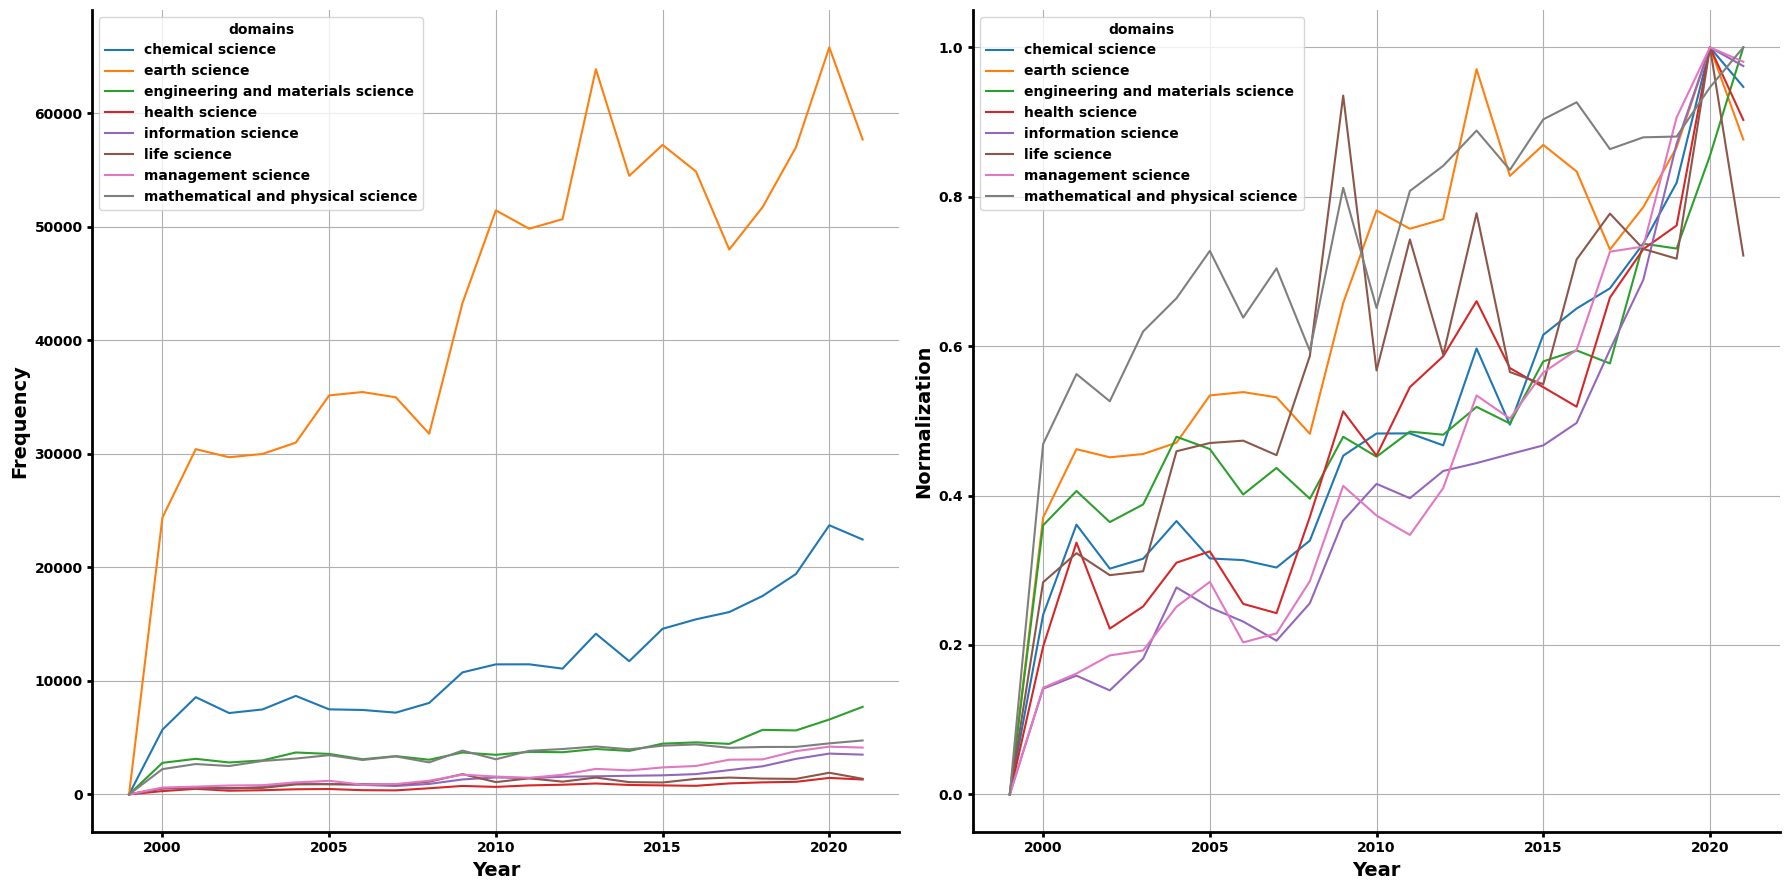

In [45]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 原始数据绘图（左图）和归一化数据绘图（右图）
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9), sharex=True)

pivot_df = pivot_df[pivot_df.index >= 1999]


# 左图：原始频次
for column in pivot_df.columns:
    axes[0].plot(pivot_df.index, pivot_df[column], label=column)
axes[0].set_xlabel('Year', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Frequency', fontweight='bold', fontsize=14)

# 先创建 legend，再加粗标题和条目
leg0 = axes[0].legend(title='domains', prop={'weight': 'bold'})
leg0.get_title().set_fontweight('bold')  # 加粗 legend 标题

axes[0].grid(True)

# 右图：归一化后的频次
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(pivot_df)
normalized_df = pd.DataFrame(normalized_data, index=pivot_df.index, columns=pivot_df.columns)
for column in normalized_df.columns:
    axes[1].plot(normalized_df.index, normalized_df[column], label=column)
axes[1].set_xlabel('Year', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Normalization', fontweight='bold', fontsize=14)

leg1 = axes[1].legend(title='domains', prop={'weight': 'bold'})
leg1.get_title().set_fontweight('bold')

axes[1].grid(True)

# 美化：加粗脊线、隐藏上下框线、加粗刻度线、加粗刻度标签
for ax in axes:
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', width=2)
    plt.setp(ax.get_xticklabels(), fontweight='bold')
    plt.setp(ax.get_yticklabels(), fontweight='bold')

plt.tight_layout()
plt.savefig('result_beautified_legend_fixed.png', dpi=300)
plt.show()


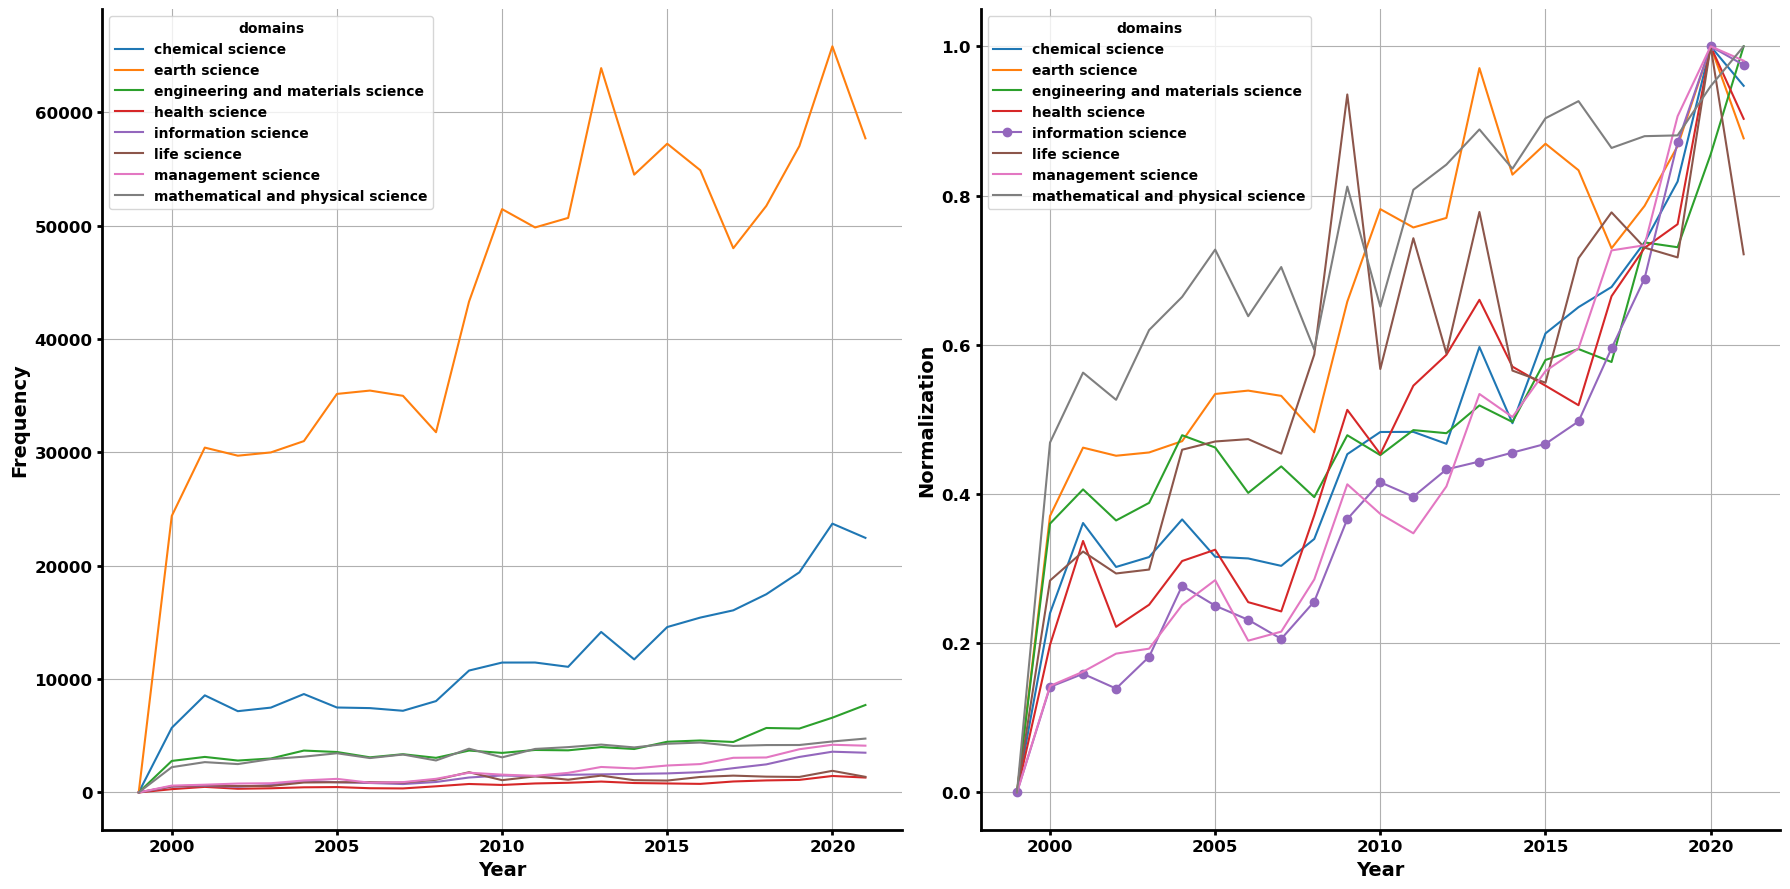

In [47]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 原始数据绘图（左图）和归一化数据绘图（右图）
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9), sharex=True)

pivot_df = pivot_df[pivot_df.index >= 1999]

# 左图：原始频次
for column in pivot_df.columns:
    axes[0].plot(pivot_df.index, pivot_df[column], label=column)
axes[0].set_xlabel('Year', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Frequency', fontweight='bold', fontsize=14)
leg0 = axes[0].legend(title='domains', prop={'weight': 'bold'})
leg0.get_title().set_fontweight('bold')
axes[0].grid(True)

# 右图：归一化后的频次，给“information science”加圆点
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(pivot_df)
normalized_df = pd.DataFrame(normalized_data, index=pivot_df.index, columns=pivot_df.columns)

for column in normalized_df.columns:
    if column == 'information science':
        axes[1].plot(
            normalized_df.index,
            normalized_df[column],
            label=column,
            marker='o',          # 圆点
            markersize=6,        # 点大小
            linestyle='-'        # 保持线型
        )
    else:
        axes[1].plot(normalized_df.index, normalized_df[column], label=column)

axes[1].set_xlabel('Year', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Normalization', fontweight='bold', fontsize=14)
leg1 = axes[1].legend(title='domains', prop={'weight': 'bold'})
leg1.get_title().set_fontweight('bold')
axes[1].grid(True)

# 美化：加粗脊线、隐藏上下框线、加粗刻度线、加粗刻度标签
for ax in axes:
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', width=2, labelsize=12)
    plt.setp(ax.get_xticklabels(), fontweight='bold')
    plt.setp(ax.get_yticklabels(), fontweight='bold')

plt.tight_layout()
plt.savefig('result_with_marker.png', dpi=600)
plt.show()
